# Dockless Scooter Bayesian Network

Loading bayesnet and data.

In [22]:
from dockless_model import DocklessBayesNet
from dockless_data import *
import pandas as pd

In [124]:
dl_model = DocklessBayesNet()
dl_model.load_data()

Loading Scooter Data ...


/Users/sanjayyepuri/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  


Scooter Data Loaded.
Loading Census Data ...
Census Data Loaded.
Loading Class Data ...


KeyboardInterrupt: 

Precomputing conditional probabilities

In [4]:
dl_model.compute_start_region_distribution()

In [6]:
dl_data = dl_model.data

In [11]:
dl_model.compute_distance_distribution(12)
dl_model.gibbs_sample(10, 12)

0.3564760684967041
0.026952719688415526


[(12, 11.75, 'RLM', 415, '000401'),
 (12, 11.75, 'RLM', 415, '000500'),
 (12, 11.5, 'RLM', 415, '000500'),
 (12, 11.5, 'RLM', 415, '000401'),
 (12, 11.5, 'RLM', 415, '000500'),
 (12, 11.75, 'RLM', 415, '000500'),
 (12, 11.5, 'RLM', 415, '000500'),
 (12, 11.5, 'RLM', 595, '000500'),
 (12, 11.5, 'CBA', 595, '000500'),
 (12, 11.5, 'CPE', 595, '000500')]

In [12]:
dl_model.compute_distance_distribution(9)
dl_model.gibbs_sample(10, 9)

0.3119208812713623
0.01627941131591797


[(9, 8.75, 'SUT', 255, '000604'),
 (9, 8.75, 'SUT', 255, '000604'),
 (9, 8.75, 'SUT', 485, '000604'),
 (9, 8.75, 'SUT', 485, '000604'),
 (9, 8.75, 'SUT', 405, '000604'),
 (9, 8.75, 'SUT', 405, '000603'),
 (9, 8.75, 'SUT', 405, '000604'),
 (9, 8.75, 'SUT', 405, '000604'),
 (9, 8.75, 'UTC', 405, '000604'),
 (9, 8.75, 'UTC', 405, '000604')]

## Comparing Original Data Distribution and Modeled One

In [45]:
data = []
for i in range(8, 17):
    dl_model.compute_distance_distribution(i)
    data.extend(dl_model.gibbs_sample(10000, i))

0.2902710437774658
0.019165320801734925
0.3657538890838623
0.018780752635002135
0.3391299247741699
0.017875361704826356
0.30733728408813477
0.018445457291603087
0.29127001762390137
0.017205397129058837
0.32146620750427246
0.018937350869178773
0.31360602378845215
0.019735879397392273
0.31679701805114746
0.01782086856365204
0.2977306842803955
0.01820083451271057


In [46]:
df = pd.DataFrame(data, columns=['class_time', 'start_time', 'building', 'distance', 'tract_start'])
sampled_data = df.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
total = float(sum(sampled_data['count']))
sampled_data['proportion'] = sampled_data['count'].apply(lambda x: x/total)
sampled_data

,tract_start,count,proportion
0,000204,1449,0.016100
1,000401,21769,0.241878
2,000500,8351,0.092789
3,000603,28222,0.313578
4,000604,25957,0.288411
5,000700,4252,0.047244


In [44]:
original_data = dl_data.transformed_endpoints.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
total = float(sum(original_data['count']))
original_data['proportion'] = original_data['count'].apply(lambda x: x/total)
original_data

,tract_start,count,proportion
0,000204,6680,0.013659
1,000401,81055,0.165741
2,000500,33338,0.068169
3,000603,177054,0.362039
4,000604,163038,0.333379
5,000700,27882,0.057013


wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf
wtf


0          444
1            0
2         1311
3          905
4         1238
5         1090
6          369
7         1183
8         1331
9         1118
10         757
11         983
12        1073
13         633
14        1613
15         418
16         894
17          54
18         704
19         580
20        1365
21        1249
22        1266
23        1014
24         609
25         818
26         671
27         497
28         573
29        1277
          ... 
489017     672
489018     855
489019     789
489020     715
489021    2215
489022    1940
489023     609
489024    1129
489025     456
489026    1042
489027     623
489028     599
489029    1024
489030    1235
489031    1418
489032    1718
489033     785
489034     889
489035     325
489036     961
489037       0
489038    1103
489039    1560
489040    1413
489041     502
489042    1754
489043     712
489044    1110
489045     512
489046     706
Name: distance, Length: 489047, dtype: int64

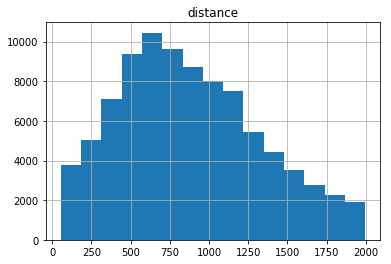

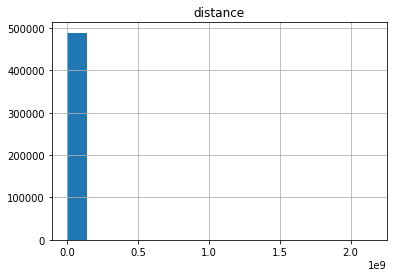

In [151]:
df.hist(bins=15, column='distance')
dl_data.transformed_endpoints['distance'] = dl_data.transformed_endpoints['Trip Distance'].apply(lambda x: int(x))
dl_data.transformed_endpoints.hist(bins = 15, column = 'distance')
dl_data.transformed_endpoints['distance']

In [75]:
from scipy.stats import chisquare

results = chisquare(sampled_data['proportion'], f_exp=original_data['proportion'])
print(results)

Power_divergenceResult(statistic=0.05852902341764081, pvalue=0.9999568274909372)
